## 네이버에서 특정 기사 가져오기

In [1]:
import requests
import json
from selenium import webdriver

# id 가져오기
with open('account.json','r') as f :
    account = json.load(f)

In [2]:
# 네이버 켜기

driver = webdriver.Chrome('./chromedriver')
driver.get("https://www.naver.com")

In [3]:
# 네이버 로그인

driver.find_element_by_id("id").send_keys(account['id'])
driver.find_element_by_id("pw").send_keys(account['pw'])
driver.find_element_by_css_selector(".btn_login > input").click()

In [4]:
# '뉴스' 탭에 들어가기

driver.find_element_by_css_selector("#PM_ID_serviceNavi > li:nth-child(2) > a").click()

In [5]:
# 특정 뉴스 기사에 들어가기

driver.find_element_by_css_selector("#text_today_main_news_801001 > li:nth-child(1) > div > a").click()
driver.find_element_by_xpath("""//*[@id="1072268_2815259"]""").click()

In [6]:
# 해당 페이지에서 html 구하기

from bs4 import BeautifulSoup

html = driver.page_source
current_html = BeautifulSoup(html,'lxml')
current_html

<!DOCTYPE html>
<html data-useragent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36" lang="ko" xmlns="http://www.w3.org/1999/xhtml"><head><style id="_jmc_no_tap_highlight_tag_" type="text/css"></style>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1106" name="viewport"/>
<title>박근혜 '국정농단+특활비+공천개입' 징역 32년…19개 혐의 유죄(종합) : 네이버 뉴스</title>
<meta content="연합뉴스 : 네이버뉴스" property="me2:post_tag"/>
<meta content="연합뉴스" property="me2:category1"/>
<meta content="정치" property="me2:category2"/>
<meta content="https://imgnews.pstatic.net/image/origin/001/2018/07/20/10222922.jpg" property="me2:image"/>
<meta content="박근혜 '국정농단+특활비+공천개입' 징역 32년…19개 혐의 유죄(종합)" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="http://news.naver.com/main/read.nhn?mode=LSD&amp;mid=sec&amp;oid=001&amp;aid=0010222922&amp;sid1=001" property="og:url"/>
<meta content="h

In [90]:
temp = current_html.select_one('#articleBodyContents')
temp.text.split('\t')[2]

'세 사건 총 21개 혐의 기소…벌금 180억원·추징금 33억원 부과국정농단 1년9개월 만에 1심 종료…국정농단 항소심은 내달 선고검찰, 특활비 뇌물 무죄 반발…\'항소심 궐석재판\' 이어질 듯박근혜 전 대통령. [연합뉴스 자료사진](서울=연합뉴스) 고동욱 기자 = 20일 박근혜 전 대통령이 국정원 특활비 수수 사건과 옛 새누리당 공천 개입 사건으로 징역형을 선고받음에 따라, 총 21개에 달하는 박 전 대통령의 혐의 전체에 대한 1심 판단이 모두 마무리됐다.    삼성의 제3자 뇌물 등 일부를 제외한 대부분 혐의를 유죄로 인정받은 박 전 대통령의 총 형량은 징역 32년에 이른다. 벌금 180억원과 추징금 33억원도 있다.    국정농단 관련 사건으로 징역 24년과 벌금 180억원이 먼저 선고됐고 국정원 특활비 수수 사건으로 징역 6년과 추징금 33억원, 옛 새누리당 공천 개입 사건으로 징역 2년이 더해졌다.    2016년 10월 \'최순실 태블릿PC 보도\'로 국정농단 정국이 시작된 이후 1심 판단이 끝나기까지 1년 9개월이 걸렸다.    박 전 대통령은 검찰과 특검의 연이은 수사를 거쳐 국정농단 사건과 관련해 18개 혐의로 지난해 4월 구속기소 됐다.    \'비선실세\' 최순실씨와 공모해 미르·K스포츠재단에 대기업들이 출연금을 내도록 한 혐의, 삼성전자 이재용 부회장으로부터 최씨 딸 정유라씨의 승마 지원비 등 433억원 상당의 뇌물을 받거나 요구한 혐의가 우선 적용됐다.    그 외에 최씨의 이권을 위해 직권을 남용해 기업에 압력을 넣고, 문화·예술계 지원배제 명단을 작성 관리하도록 하고, 정호성 전 비서관을 시켜 최씨에게 정부 기밀문서를 유출한 혐의 등도 있다.    1심 재판부는 대부분 혐의를 유죄로 판단했지만, 삼성그룹의 재단 출연금과 한국동계스포츠영재센터 지원금 등에 적용된 제3자 뇌물수수 혐의는 인정하지 않았다. 정유라씨에 대한 지원금 중 일부도 무죄로 판단했다.    검찰은 재판부가 \'경영권 승계를 위한 부정한 청탁\'의 존재를 인정하지 않은

In [93]:
text = temp.text.split('\t')[2]

In [94]:
from konlpy.tag import Twitter

t = Twitter()

In [95]:
t.nouns(text)

['세',
 '사건',
 '총',
 '개',
 '혐의',
 '기소',
 '벌금',
 '억원',
 '추징',
 '금',
 '억원',
 '부과',
 '국정',
 '농단',
 '년',
 '개월',
 '심',
 '종료',
 '국정',
 '농단',
 '항소심',
 '내달',
 '선고',
 '검찰',
 '특활비',
 '뇌물',
 '무죄',
 '반발',
 '항소심',
 '궐석재판',
 '듯',
 '박근혜',
 '전',
 '대통령',
 '연합뉴스',
 '자료',
 '사진',
 '서울',
 '연합뉴스',
 '고동',
 '욱',
 '기자',
 '일',
 '박근혜',
 '전',
 '대통령',
 '국정원',
 '특활비',
 '수수',
 '사건',
 '옛',
 '새누리당',
 '공천',
 '개입',
 '사건',
 '징역형',
 '선고',
 '음',
 '총',
 '개',
 '박',
 '전',
 '대통령',
 '혐의',
 '전체',
 '대한',
 '심',
 '판단',
 '모두',
 '마무리',
 '삼성',
 '제',
 '자',
 '뇌물',
 '등',
 '일부',
 '대부분',
 '혐의',
 '유죄',
 '박',
 '전',
 '대통령',
 '총',
 '형량',
 '징역',
 '년',
 '벌금',
 '억원',
 '추징',
 '금',
 '억원',
 '국정',
 '농단',
 '관련',
 '사건',
 '징역',
 '년',
 '벌금',
 '억원',
 '먼저',
 '선고',
 '국정원',
 '특활비',
 '수수',
 '사건',
 '징역',
 '년',
 '추징',
 '금',
 '억원',
 '옛',
 '새누리당',
 '공천',
 '개입',
 '사건',
 '징역',
 '년',
 '년',
 '월',
 '최순실',
 '태블릿',
 '보도',
 '로',
 '국정',
 '농단',
 '정국',
 '이후',
 '심',
 '판단',
 '년',
 '개월',
 '박',
 '전',
 '대통령',
 '검찰',
 '특검',
 '연',
 '수사',
 '국정',
 '농단',
 '사건',
 '개',
 '혐의',
 '지난해',
 '

In [96]:
t.morphs(text)

['세',
 '사건',
 '총',
 '21',
 '개',
 '혐의',
 '기소',
 '…',
 '벌금',
 '180',
 '억원',
 '·',
 '추징',
 '금',
 '33',
 '억원',
 '부과',
 '국정',
 '농단',
 '1',
 '년',
 '9',
 '개월',
 '만에',
 '1',
 '심',
 '종료',
 '…',
 '국정',
 '농단',
 '항소심',
 '은',
 '내달',
 '선고',
 '검찰',
 ',',
 '특활비',
 '뇌물',
 '무죄',
 '반발',
 '…',
 "'",
 '항소심',
 '궐석재판',
 "'",
 '이어질',
 '듯',
 '박근혜',
 '전',
 '대통령',
 '.',
 '[',
 '연합뉴스',
 '자료',
 '사진',
 '](',
 '서울',
 '=',
 '연합뉴스',
 ')',
 '고동',
 '욱',
 '기자',
 '=',
 '20',
 '일',
 '박근혜',
 '전',
 '대통령',
 '이',
 '국정원',
 '특활비',
 '수수',
 '사건',
 '과',
 '옛',
 '새누리당',
 '공천',
 '개입',
 '사건',
 '으로',
 '징역형',
 '을',
 '선고',
 '받',
 '음',
 '에',
 '따라',
 ',',
 '총',
 '21',
 '개',
 '에',
 '달',
 '하',
 '는',
 '박',
 '전',
 '대통령',
 '의',
 '혐의',
 '전체',
 '에',
 '대한',
 '1',
 '심',
 '판단',
 '이',
 '모두',
 '마무리',
 '됐',
 '다',
 '.',
 '삼성',
 '의',
 '제',
 '3',
 '자',
 '뇌물',
 '등',
 '일부',
 '를',
 '제외한',
 '대부분',
 '혐의',
 '를',
 '유죄',
 '로',
 '인정받',
 '은',
 '박',
 '전',
 '대통령',
 '의',
 '총',
 '형량',
 '은',
 '징역',
 '32',
 '년',
 '에',
 '이른',
 '다',
 '.',
 '벌금',
 '180',
 '억원',
 '과',
 '추징',


In [97]:
t.pos(text)

[('세', 'Noun'),
 ('사건', 'Noun'),
 ('총', 'Noun'),
 ('21', 'Number'),
 ('개', 'Noun'),
 ('혐의', 'Noun'),
 ('기소', 'Noun'),
 ('…', 'Foreign'),
 ('벌금', 'Noun'),
 ('180', 'Number'),
 ('억원', 'Noun'),
 ('·', 'Foreign'),
 ('추징', 'Noun'),
 ('금', 'Noun'),
 ('33', 'Number'),
 ('억원', 'Noun'),
 ('부과', 'Noun'),
 ('국정', 'Noun'),
 ('농단', 'Noun'),
 ('1', 'Number'),
 ('년', 'Noun'),
 ('9', 'Number'),
 ('개월', 'Noun'),
 ('만에', 'Josa'),
 ('1', 'Number'),
 ('심', 'Noun'),
 ('종료', 'Noun'),
 ('…', 'Foreign'),
 ('국정', 'Noun'),
 ('농단', 'Noun'),
 ('항소심', 'Noun'),
 ('은', 'Josa'),
 ('내달', 'Noun'),
 ('선고', 'Noun'),
 ('검찰', 'Noun'),
 (',', 'Punctuation'),
 ('특활비', 'Noun'),
 ('뇌물', 'Noun'),
 ('무죄', 'Noun'),
 ('반발', 'Noun'),
 ('…', 'Foreign'),
 ("'", 'Punctuation'),
 ('항소심', 'Noun'),
 ('궐석재판', 'Noun'),
 ("'", 'Punctuation'),
 ('이어질', 'Verb'),
 ('듯', 'Noun'),
 ('박근혜', 'Noun'),
 ('전', 'Noun'),
 ('대통령', 'Noun'),
 ('.', 'Punctuation'),
 ('[', 'Punctuation'),
 ('연합뉴스', 'Noun'),
 ('자료', 'Noun'),
 ('사진', 'Noun'),
 ('](', 'Punctua

In [98]:
t.phrases(text)

['세 사건 총 21개 혐의 기소',
 '사건 총 21개 혐의 기소',
 '총 21개 혐의 기소',
 '21개 혐의 기소',
 '혐의 기소',
 '벌금 180억원',
 '추징금 33억원 부과국정농단 1년9개월',
 '33억원 부과국정농단 1년9개월',
 '부과국정농단 1년9개월',
 '1심 종료',
 '국정농단 항소심',
 '내달 선고검찰',
 '특활비 뇌물 무죄 반발',
 '뇌물 무죄 반발',
 '무죄 반발',
 '항소심 궐석재판',
 '듯박근혜 전 대통령',
 '전 대통령',
 '연합뉴스 자료사진',
 '서울',
 '연합뉴스',
 '고동욱 기자',
 '20일 박근혜 전 대통령',
 '박근혜 전 대통령',
 '국정원 특활비 수수 사건',
 '특활비 수수 사건',
 '수수 사건',
 '수수 사건과 옛 새누리당 공천 개입 사건',
 '사건과 옛 새누리당 공천 개입 사건',
 '옛 새누리당 공천 개입 사건',
 '새누리당 공천 개입 사건',
 '공천 개입 사건',
 '개입 사건',
 '징역형',
 '선고',
 '총 21개',
 '박 전 대통령',
 '박 전 대통령의 혐의 전체',
 '전 대통령의 혐의 전체',
 '대통령의 혐의 전체',
 '혐의 전체',
 '대한 1심 판단',
 '1심 판단',
 '모두 마무리',
 '삼성',
 '삼성의 제3자 뇌물 등 일부',
 '제3자 뇌물 등 일부',
 '뇌물 등 일부',
 '등 일부',
 '대부분 혐의',
 '유죄',
 '박 전 대통령의 총 형량',
 '전 대통령의 총 형량',
 '대통령의 총 형량',
 '총 형량',
 '징역 32년',
 '벌금 180억원과 추징금 33억원',
 '180억원과 추징금 33억원',
 '추징금 33억원',
 '국정농단 관련 사건',
 '관련 사건',
 '징역 24년',
 '징역 24년과 벌금 180억원',
 '24년과 벌금 180억원',
 '먼저 선고',
 '징역 6년',
 '징역 6년과 추징금 33억원',
 '6년과 추징금 33억원',
 '징역 2년',
 '2016년 10월',
 '최순실 태블

In [109]:
global_unique = []
global_unique_count = []

for row in text.split(".") :
    print("문장 >>> ",row)
    term = t.nouns(row)
    print('명사의 수 >>>',len(term))
    
    unique = set(term)
    print(unique)
    global_unique += list(unique)
    global_unique = list(set(global_unique)) # 중복 제거
    global_unique_count.append(len(global_unique))
    print(global_unique)
    print('len(unique) >>> ',len(unique))
    print('len(global_unique) >>> ', len(global_unique))
    print('-'*50)
    print()

문장 >>>  세 사건 총 21개 혐의 기소…벌금 180억원·추징금 33억원 부과국정농단 1년9개월 만에 1심 종료…국정농단 항소심은 내달 선고검찰, 특활비 뇌물 무죄 반발…'항소심 궐석재판' 이어질 듯박근혜 전 대통령
명사의 수 >>> 34
{'국정', '종료', '대통령', '금', '무죄', '뇌물', '반발', '전', '부과', '추징', '박근혜', '기소', '항소심', '억원', '궐석재판', '혐의', '벌금', '개월', '듯', '사건', '검찰', '선고', '농단', '특활비', '년', '개', '세', '심', '총', '내달'}
['국정', '종료', '대통령', '무죄', '금', '전', '뇌물', '반발', '부과', '추징', '박근혜', '기소', '항소심', '억원', '궐석재판', '혐의', '벌금', '개월', '듯', '사건', '검찰', '선고', '농단', '특활비', '년', '개', '세', '심', '총', '내달']
len(unique) >>>  30
len(global_unique) >>>  30
--------------------------------------------------

문장 >>>   [연합뉴스 자료사진](서울=연합뉴스) 고동욱 기자 = 20일 박근혜 전 대통령이 국정원 특활비 수수 사건과 옛 새누리당 공천 개입 사건으로 징역형을 선고받음에 따라, 총 21개에 달하는 박 전 대통령의 혐의 전체에 대한 1심 판단이 모두 마무리됐다
명사의 수 >>> 36
{'음', '연합뉴스', '수수', '대통령', '징역형', '전체', '판단', '박', '개입', '일', '전', '기자', '박근혜', '자료', '고동', '욱', '새누리당', '국정원', '혐의', '사건', '대한', '선고', '모두', '특활비', '옛', '서울', '개', '심', '마무리', '공천', '총', '사진'}
['국정', '음', '종료', '연합뉴스', '수수', '대통령', '징역형', '전체', 

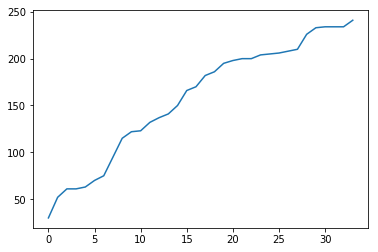

In [111]:
from matplotlib import pyplot as plt

plt.plot(global_unique_count)
plt.savefig('unique_word_count_practice.png')